# Convolutional Neural Networks for Image Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
single_image.shape

(28, 28)

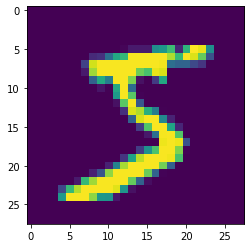

In [7]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,10)

In [17]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.max()

1.0

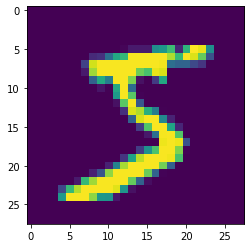

In [23]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [35]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1390 - accuracy: 0.9592 - val_loss: 0.0622 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0441 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0365 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0495 - val_accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0415 -

## Evaluate the Model

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
losses = pd.DataFrame(model.history.history)

In [38]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138978,0.959217,0.062211,0.9788
1,0.048132,0.985067,0.044731,0.9850
2,0.031388,0.990200,0.044105,0.9854
3,0.020566,0.993317,0.054071,0.9833
4,0.013750,0.995517,0.036478,0.9887


<AxesSubplot:>

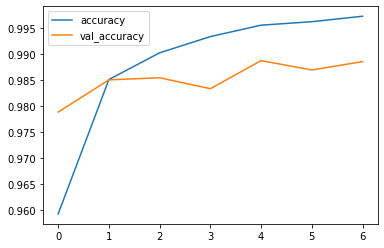

In [39]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

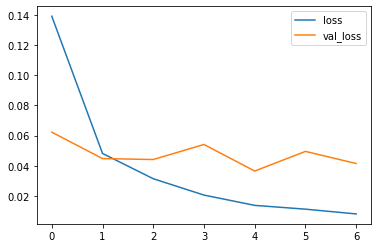

In [40]:
losses[['loss','val_loss']].plot()

In [41]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04146182909607887, 0.9884999990463257]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
predictions = model.predict_classes(x_test)

C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
y_cat_test.shape

(10000, 10)

In [45]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [46]:
predictions[0]

7

In [47]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [49]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    0,    2,    0,    1,    0,    1,    1,    0],
       [   1,    1, 1014,    1,    3,    0,    0,    9,    3,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    2,    0,    0,    7],
       [   1,    1,    0,    8,    0,  877,    3,    0,    2,    0],
       [   3,    2,    0,    0,    5,    1,  945,    0,    2,    0],
       [   0,    2,    4,    0,    0,    0,    0, 1018,    2,    2],
       [   4,    0,    1,    1,    2,    0,    2,    2,  959,    3],
       [   1,    0,    0,    2,   13,    1,    0,    6,    0,  986]],
      dtype=int64)

In [50]:
import seaborn as sns

<AxesSubplot:>

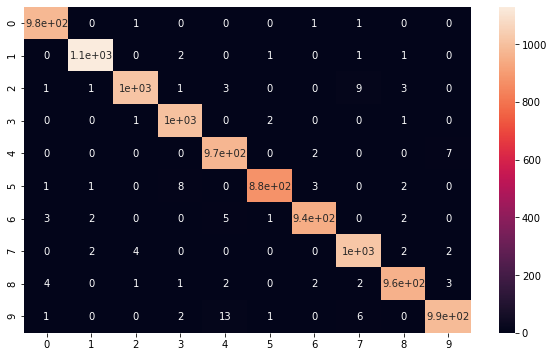

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [52]:
my_number = x_test[0]

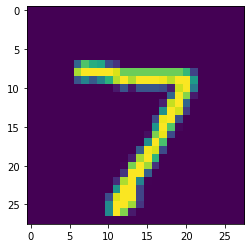

In [53]:
plt.imshow(my_number.reshape(28,28))

In [79]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

Looks like the CNN performed quite well!